#### **Data Science & Business Analytics Internship Task_6: Prediction using Decision Tree Algorithm**

In this task, we will create a Decision Tree classifier and visualize it graphically using the "Iris" dataset. We will also evaluate the classifier's ability to predict the correct class when given new data.

##### Submitted By: Aditi Marwaha

#### **Importing Libraries**

In [80]:
# Importing the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

#### **Importing and Exploring the Dataset**

In [11]:
# Importing data from csv file
data = pd.read_csv('Iris.csv')

In [14]:
# Reading the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#Checking the shape of thedataset
data.shape

(150, 6)

**There are 150 rows and 6 columns in the dataset.**

In [21]:
# Checking the datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**There are no null values present.**

In [24]:
# Checking statistical description
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [28]:
# Dropping the duplicate rows if present
data.drop_duplicates(inplace=True)

In [30]:
data.shape

(150, 6)

**There are no duplicate rows.**

In [33]:
#Checking the unique classes in the 'Species' column
print(data.Species.nunique())
print(data.Species.value_counts())

3
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


**The dataset includes 3 species: Iris-setosa, Iris-versicolor, and Iris-virginica, each with 50 entries.**

In [62]:
# Mapping Species
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [64]:
data['Species'] = data['Species'].map(species)

In [66]:
data.Species.unique()

array([0, 1, 2], dtype=int64)

In [68]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

In [70]:
X.shape, y.shape

((150, 4), (150,))

#### **Splitting Data into test and train datasets**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### **Building a decision tree classifier**

In [86]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [88]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

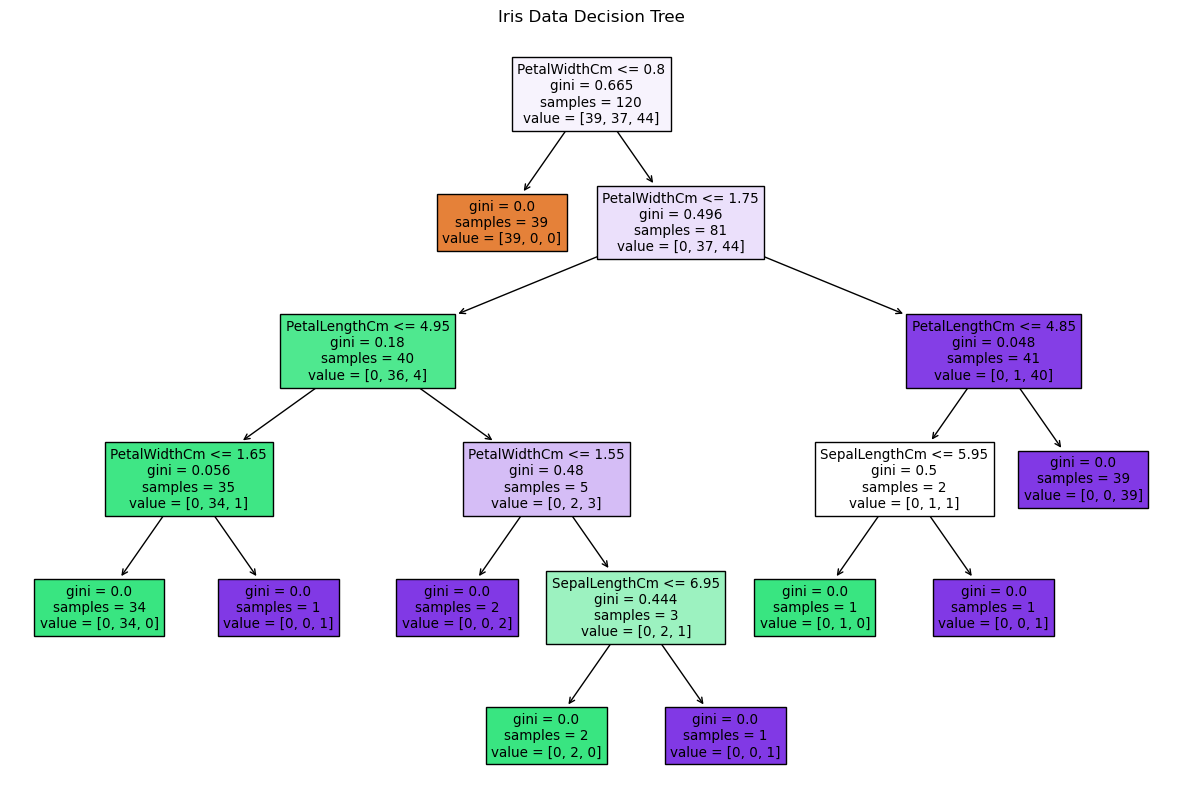

In [90]:
# Visualising Decision Tree
plt.figure(figsize = (15,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()